In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/kennedykwangari/Mall-Customer-Segmentation-Data/refs/heads/master/Mall_Customers.csv')

In [5]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


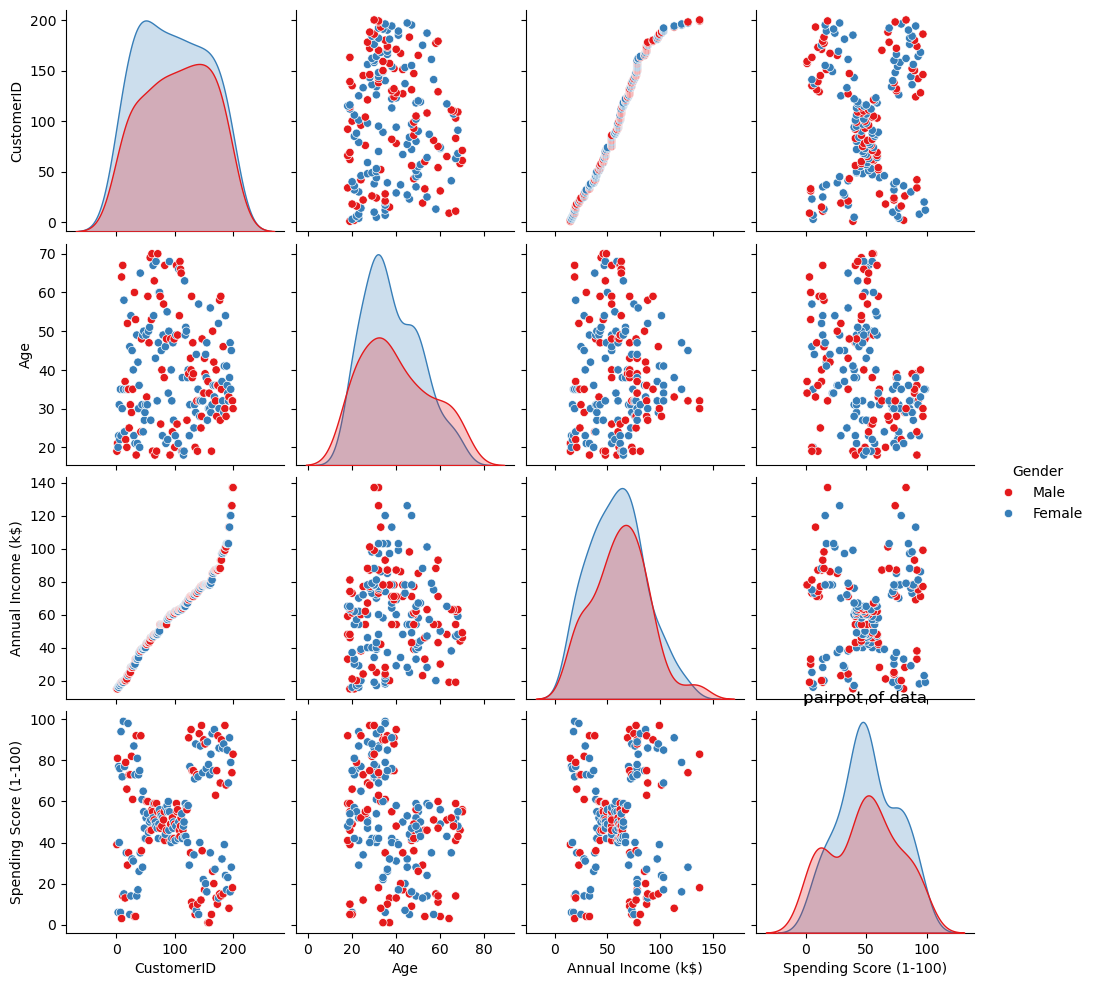

In [8]:
sns.pairplot(data, hue='Gender', kind='scatter',diag_kind='kde', palette='Set1')
plt.title('pairpot of data')
plt.show()

In [9]:
data = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [10]:
# normalize

In [11]:
scalar = StandardScaler()
X = scalar.fit_transform(data)

In [12]:
X

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [13]:
# plot Dendogram

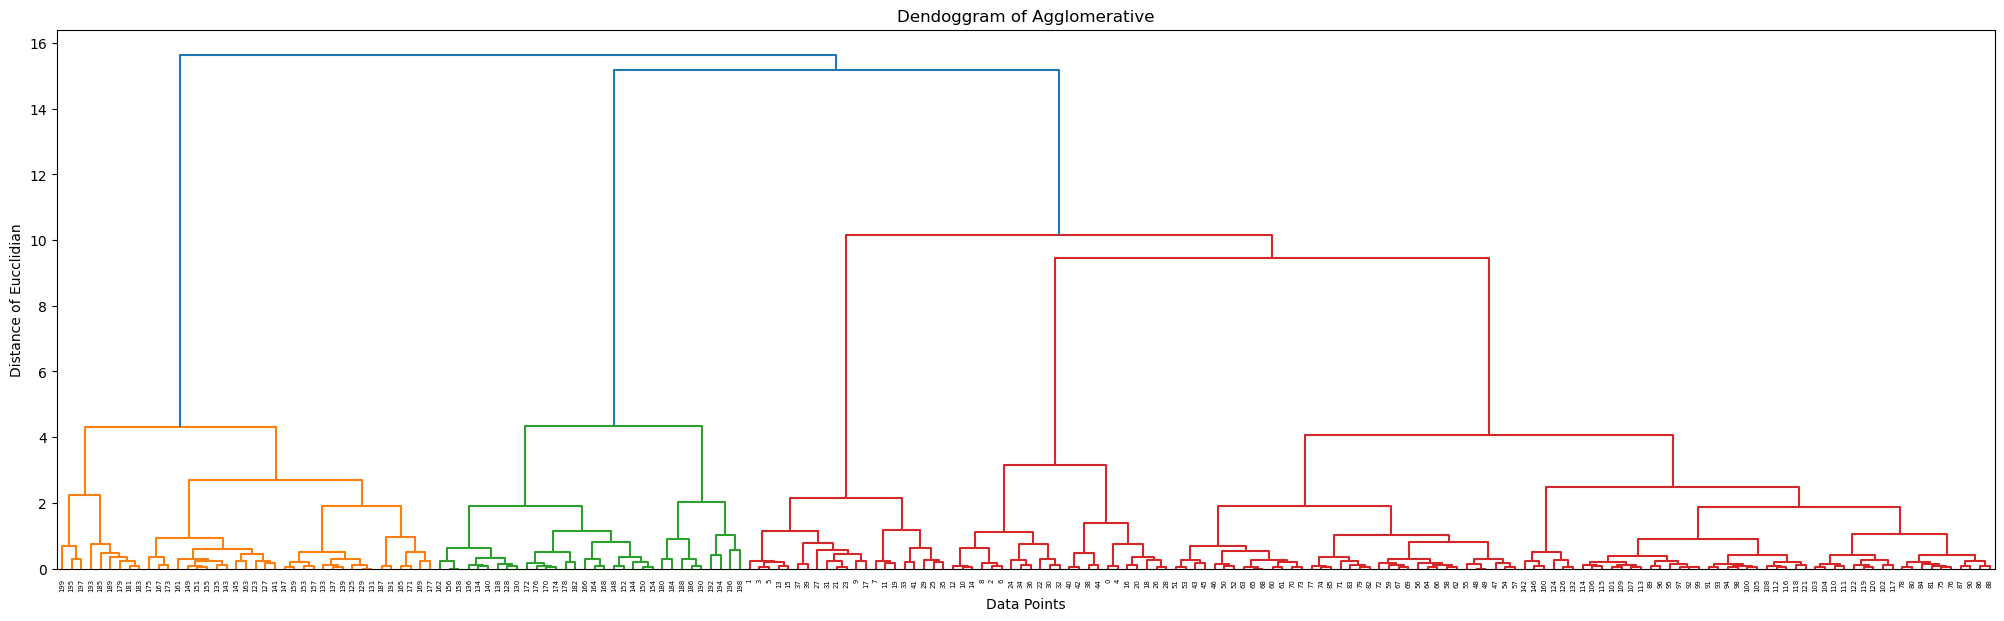

In [14]:
plt.figure(figsize=(25,7))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendoggram of Agglomerative')
plt.xlabel('Data Points')
plt.ylabel('Distance of Eucclidian')
plt.show()

In [15]:
agglom = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
y_agglom = agglom.fit_predict(X)
data.loc[:, 'Labels'] = y_agglom

In [16]:
fig = px.scatter(data, x = 'Annual Income (k$)', y = 'Spending Score (1-100)',
                 color=data['Labels'].astype(str), title='Agglomeretive Clustering',
                 labels={'Labels':'Cluster'}, color_discrete_sequence=px.colors.qualitative.Set1)
iplot(fig)